# 03 - Perspective transformation

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

## Loading camera calibration

See: 01 - Camera Calibration.ipynb

In [2]:
cameraCalibration = pickle.load( open('./camera_calibration.p', 'rb' ) )
mtx, dist = map(cameraCalibration.get, ('mtx', 'dist'))

## Load test images

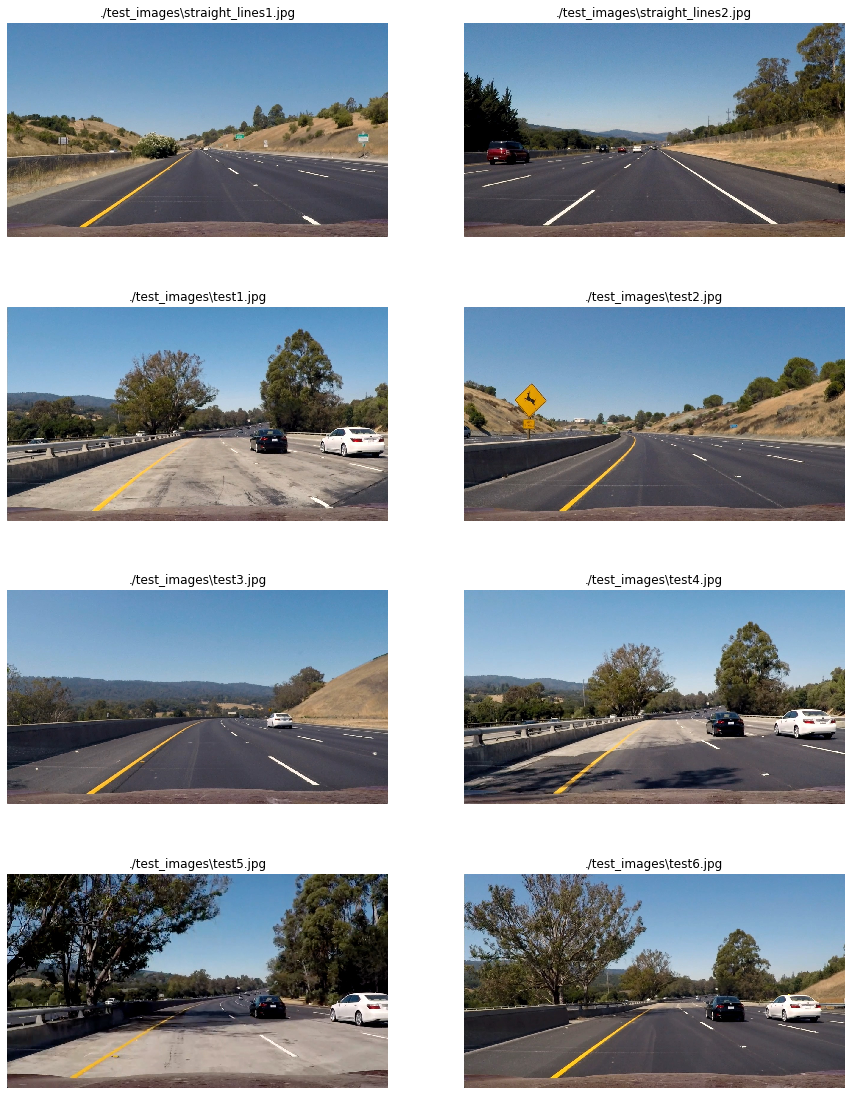

In [3]:
testImages = []
fileNames = sorted(glob.glob('./test_images/*.jpg'))
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(15, 20))
for ax, fileName in zip(axes.flat, fileNames):
    testImage = cv2.imread(fileName)
    testImages.append(testImage)
    testImage = cv2.cvtColor(testImage, cv2.COLOR_BGR2RGB)
    ax.imshow(testImage)
    ax.set_title(fileName)
    ax.axis('off')

## Undistort from the chosen test image with mtx, dist and convert it to HLS

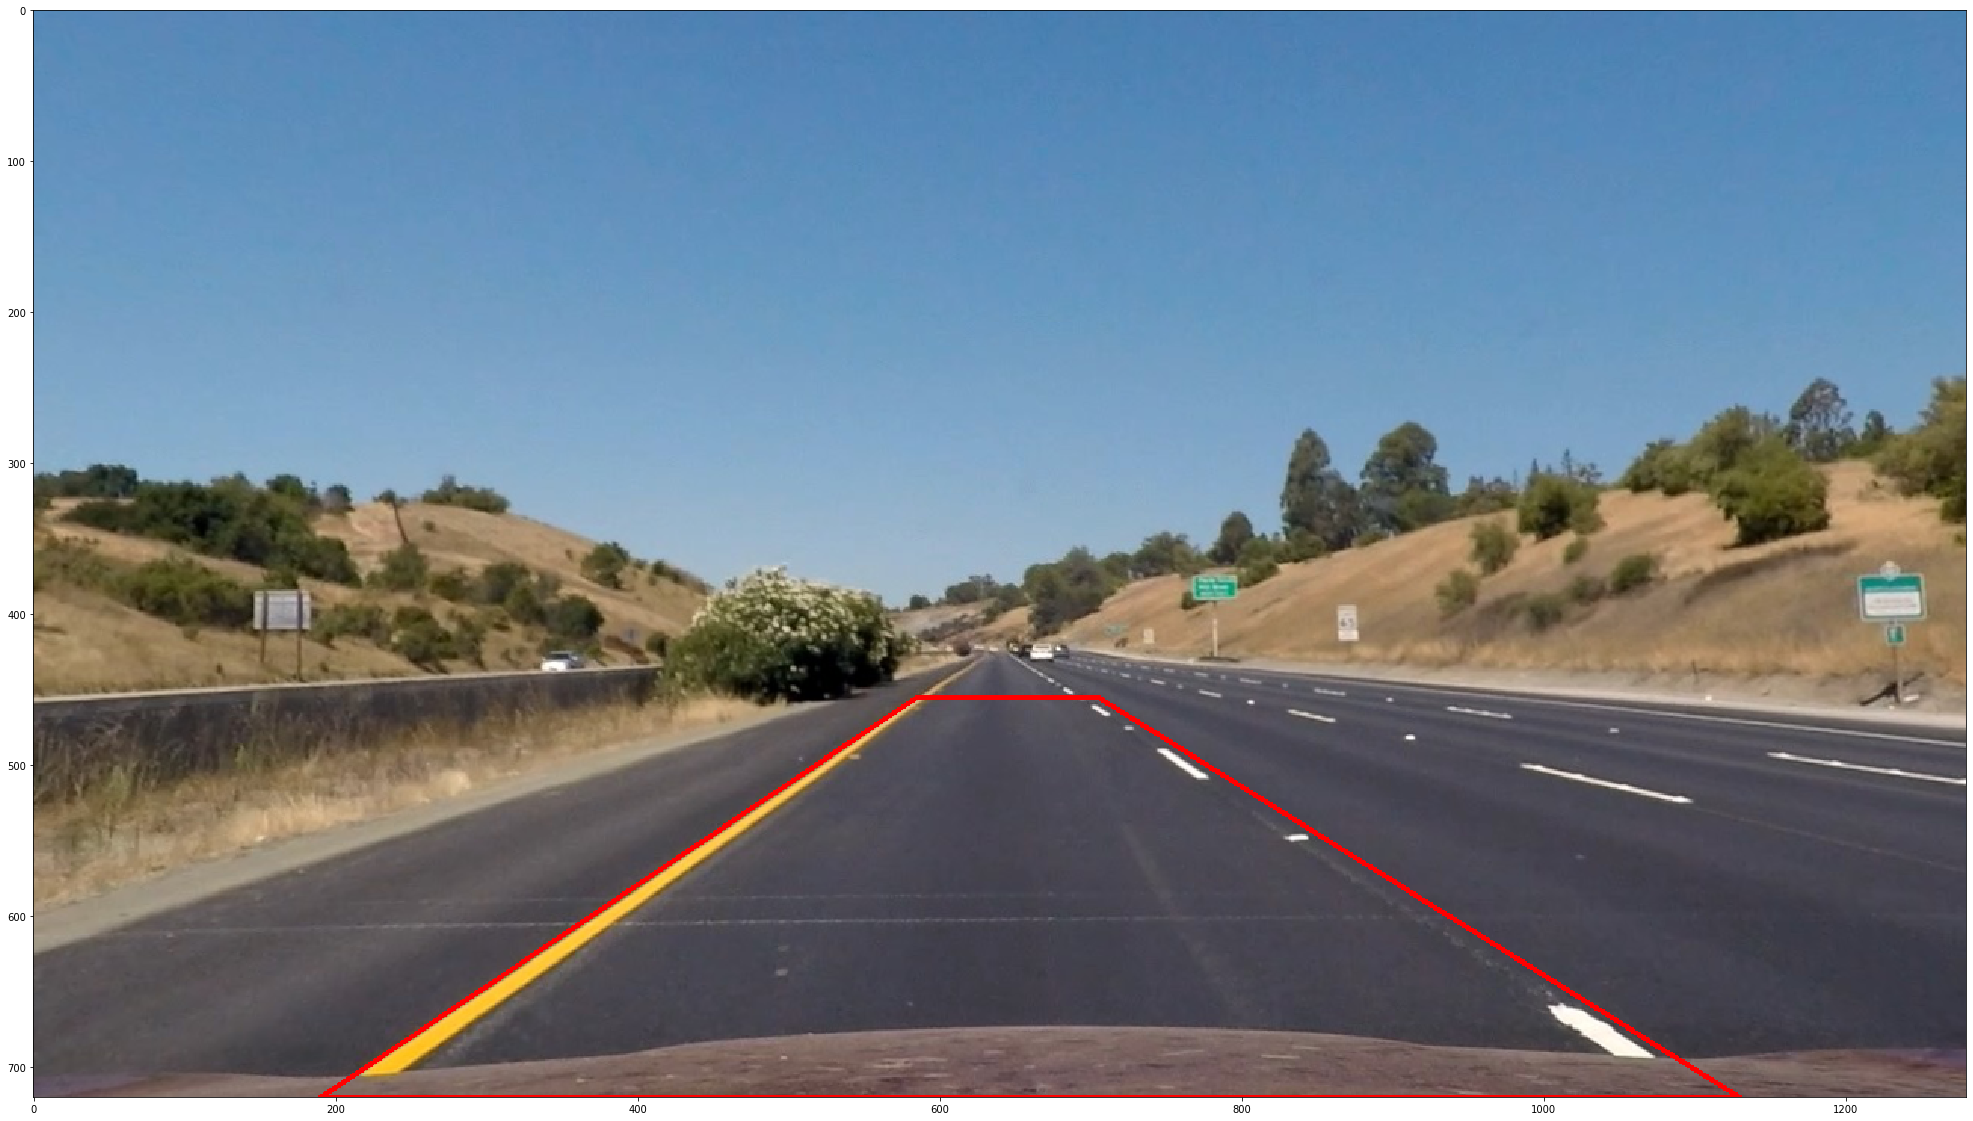

In [4]:
testImage = cv2.cvtColor(testImages[0],cv2.COLOR_BGR2RGB)
undist = cv2.undistort(testImage, mtx, dist, None, mtx)

copy = undist.copy()

xSize, ySize, _ = undist.shape

bottomY = 720
topY = 455

left1 = (190, bottomY)
left1_x, left1_y = left1
left2 = (585, topY)
left2_x, left2_y = left2

right1 = (705, topY)
right1_x, right1_y = right1
right2 = (1130, bottomY)
right2_x, right2_y = right2

color = [255, 0, 0]
thicknes = 2
cv2.line(copy, left1, left2, color, thicknes)
cv2.line(copy, left2, right1, color, thicknes)
cv2.line(copy, right1, right2, color, thicknes)
cv2.line(copy, right2, left1, color, thicknes)

fig, ax = plt.subplots(figsize=(40, 20))
ax.imshow(copy)    

## Apply a perspective transform

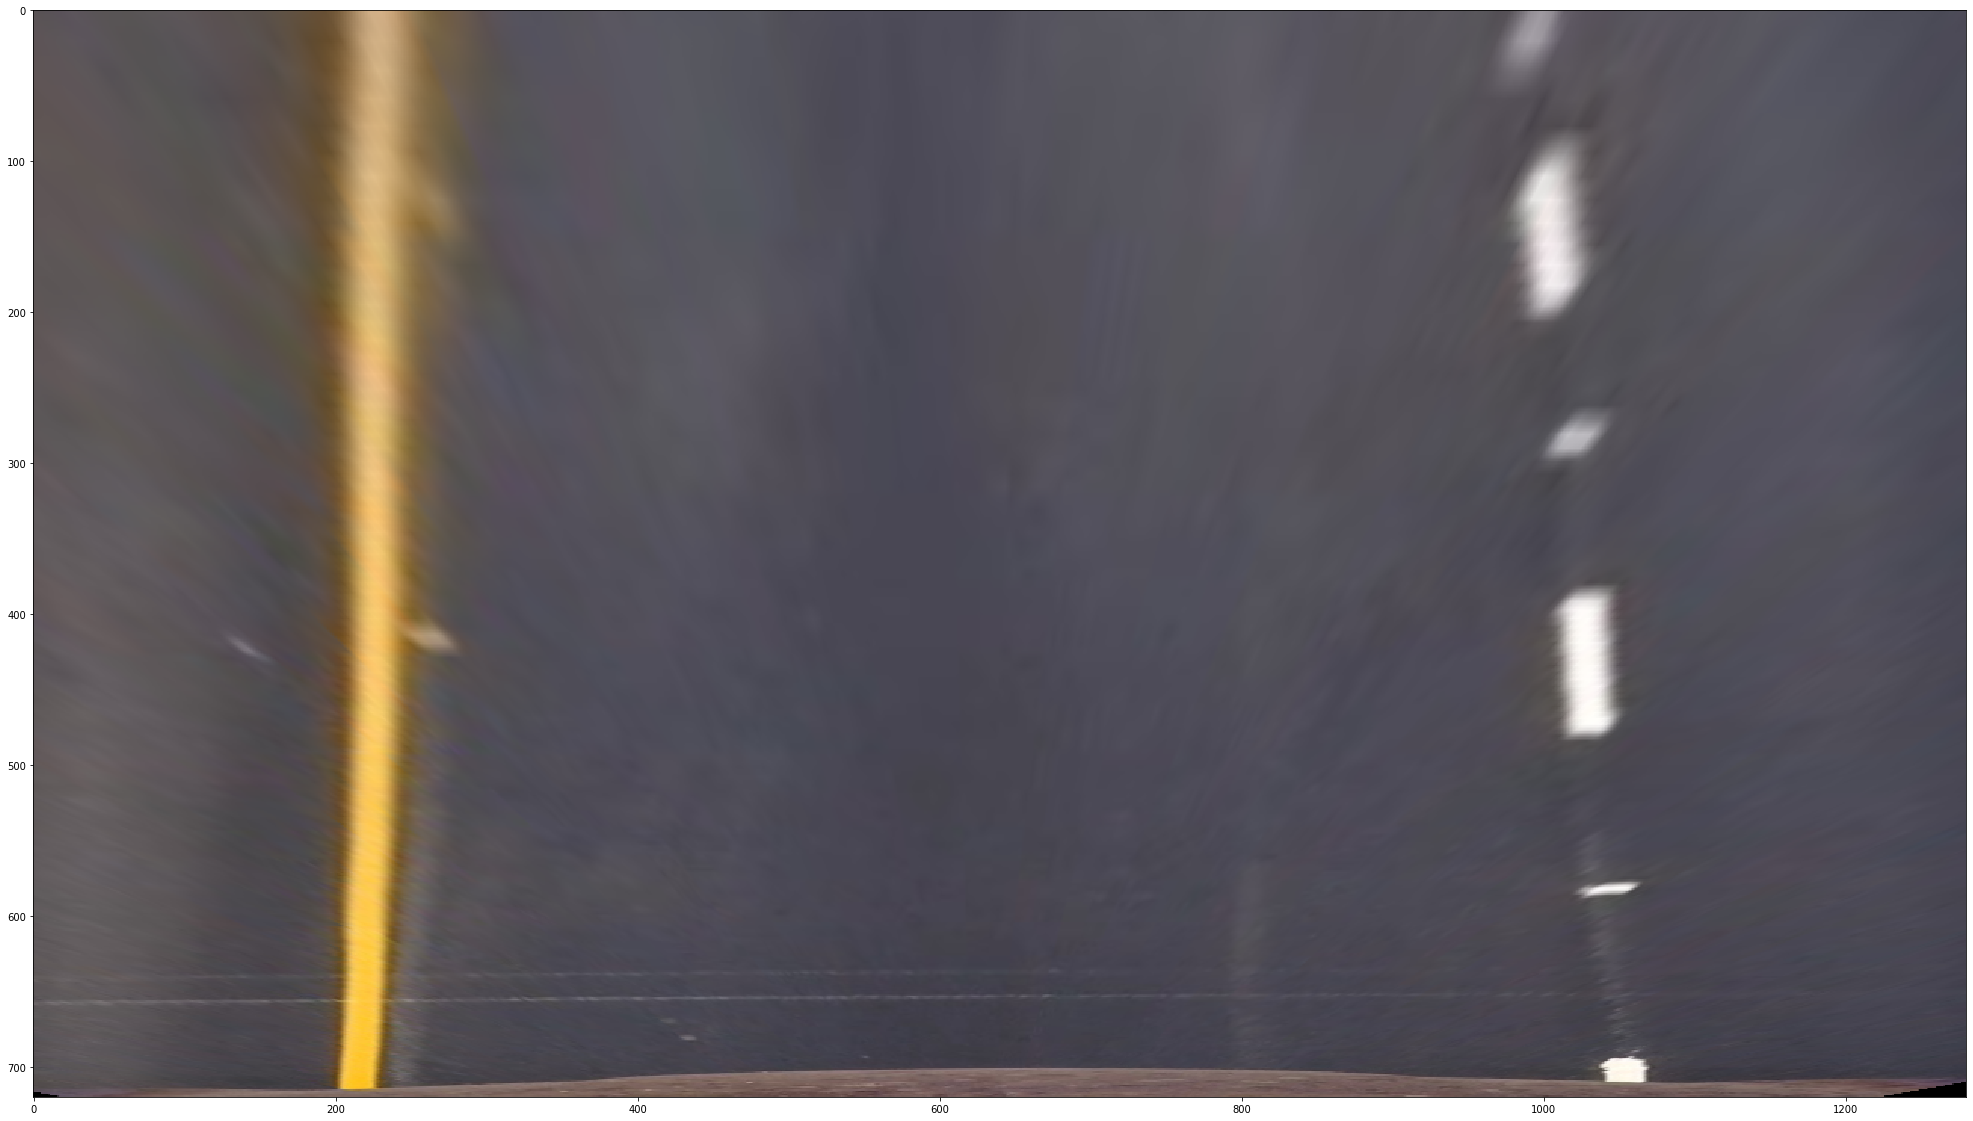

In [5]:
gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
src = np.float32([[left2_x, left2_y],
                  [right1_x, right1_y],
                  [right2_x, right2_y],
                  [left1_x, left1_y]])
nX = gray.shape[1]
nY = gray.shape[0]
imgSize = (nX, nY)
offset = 200
dst = np.float32([[offset, 0],
                  [imgSize[0]-offset, 0],
                  [imgSize[0]-offset, imgSize[1]], 
                  [offset, imgSize[1]]])
img_size = (gray.shape[1], gray.shape[0])
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
warped = cv2.warpPerspective(undist, M, imgSize)

fig, ax = plt.subplots(figsize=(40, 20))
ax.imshow(warped)  

In [6]:
pickle.dump( { 'M': M, 'Minv': Minv }, open('./perspective_transform.p', 'wb'))

In [7]:
print(M)

[[-6.83269851e-01 -1.49897451e+00  1.06311163e+03]
 [-4.99600361e-15 -1.98300615e+00  9.02267800e+02]
 [-6.93889390e-18 -2.40257838e-03  1.00000000e+00]]


In [8]:
print(Minv)

[[ 1.36363636e-01 -7.78812057e-01  5.57727273e+02]
 [-4.44089210e-16 -5.04284870e-01  4.55000000e+02]
 [-2.16840434e-18 -1.21158392e-03  1.00000000e+00]]
